In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

CPU times: user 370 ms, sys: 24.4 ms, total: 394 ms
Wall time: 527 ms


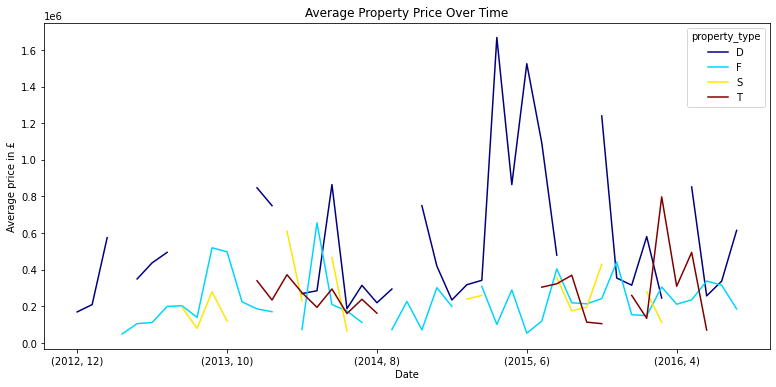

In [2]:
%%time
url = "http://localhost:8000/api/v1/properties/price"
params = {"from": "2012-12", "to": "2016-08"}
response = requests.get(url, params=params)

if response:
    data = response.json()
    if data:
        df = pd.DataFrame.from_dict(data)
        df = df.astype({"avg_price": float})
        df = df.pivot(
            index=["year", "month"], columns="property_type", values="avg_price"
        )
        df.plot(
            title="Average Property Price Over Time",
            xlabel="Date",
            ylabel="Average price in £",
            colormap="jet",
            figsize=(13, 6),
        )
        plt.savefig("out/average-property-price.png")
    else:
        print("No data to show")
else:
    print("Status code", response.status_code)
    print(response.text)

CPU times: user 225 ms, sys: 3.88 ms, total: 228 ms
Wall time: 379 ms


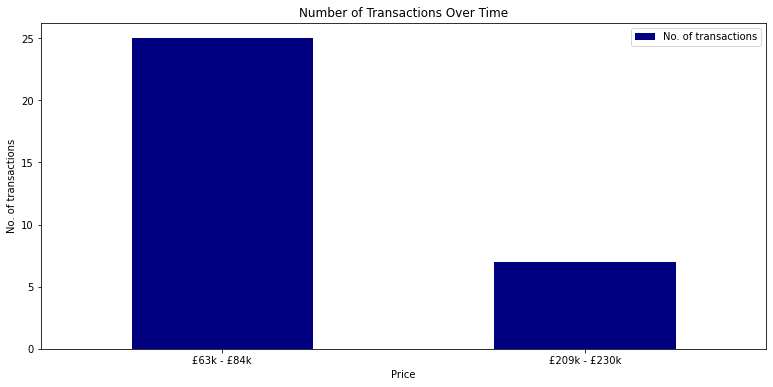

In [3]:
%%time
url = "http://localhost:8000/api/v1/properties/transaction"
params = {"date": "2020-05", "postal_code": "LE1 6AU"}
response = requests.get(url, params=params)

if response:
    data = response.json()
    if data:
        df = pd.DataFrame.from_dict(data)
        df.rename(
            columns={"bin_range": "Price", "count": "No. of transactions"}, inplace=True
        )
        df.plot.bar(
            x="Price",
            y="No. of transactions",
            ylabel="No. of transactions",
            rot=0,
            title="Number of Transactions Over Time",
            colormap="jet",
            figsize=(13, 6),
        )
        plt.savefig("out/number-of-transaction.png")
    else:
        print("No data to show")
else:
    print("Status code", response.status_code)
    print(response.text)